# <center >Data Science with Python 
## <center >Statistical and Data Techniques in Data Science 
##  <center> Homework 4

## Introduction

We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) for clustering. This data file is called `Wholesale_Customers_Data`.

It contains the following features:

* Fresh: annual spending (m.u.) on fresh products
* Milk: annual spending (m.u.) on milk products
* Grocery: annual spending (m.u.) on grocery products
* Frozen: annual spending (m.u.) on frozen products
* Detergents_Paper: annual spending (m.u.) on detergents and paper products
* Delicatessen: annual spending (m.u.) on delicatessen products
* Channel: customer channel (1: hotel/restaurant/cafe or 2: retail)
* Region: customer region (1: Lisbon, 2: Porto, 3: Other)

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).

### Question 1: Data information
* Download data from the link: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
(or `customers.csv` in the folder attached ).
* Import the data as the name 'data' and check the data head, shape, types, columms. (*Hint:*   `.head()`, `.shape`, `.dtypes`, `.columns.tolist()`.).
* Convert columns excluding 'Channel' and 'Region' to floats if necessary (*Hint:*  `.astype(np.float)`.)
* Drop out 'Chanel','Region' 'Frozen', 'Detergents_Paper', 'Delicassen' as they will not be used 

In [2]:
import pandas as pd
import numpy as np
# Write your code from here, add more cells if needed


In [3]:
data = pd.read_csv('Wholesale customers data.csv')

In [4]:
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [5]:
data.shape

(440, 8)

In [6]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [7]:
data.columns.tolist()

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

In [8]:
data.Channel.astype(np.float)
data.Region.astype(np.float).head()

0    3.0
1    3.0
2    3.0
3    3.0
4    3.0
Name: Region, dtype: float64

In [9]:
data.drop(data.columns[[0, 1, 5, 6 ,7]], axis=1, inplace=True)


In [10]:
data.columns.tolist()

['Fresh', 'Milk', 'Grocery']

### Quesiton 2: Statistical Description
In this question, we only work on the feature 'Grocery'.
 * Calculate the min, Q1 (i.e., 25%),  median, , Q3(i.e.,75%), max of the annual spending on grocery products
 * Calculate the mean, range, standard deviation (std), skewness, kurtosis index of the annual spending on grocery products.
 * Make a boxplot of the annual spending on grocery products.
 * Make a histogram of the annual spending on grocery products.

In [11]:
# Write your answer from here, add more cells if needed


In [12]:
data_of_Grocery = data.Grocery

In [13]:
data_of_Grocery.head()

0    7561
1    9568
2    7684
3    4221
4    7198
Name: Grocery, dtype: int64

In [14]:
Q1 = np.percentile(data_of_Grocery, 25)
Q1

2153.0

In [15]:
median = np.percentile(data_of_Grocery, 50)
median

4755.5

In [16]:
Q3 = np.percentile(data_of_Grocery, 75)
Q3

10655.75

In [17]:
mean = np.mean(data_of_Grocery)
mean

7951.277272727273

In [18]:
Range = data_of_Grocery.max() - data_of_Grocery.min()
Range

92777

In [19]:
std = np.std(data_of_Grocery)
std

9492.357637519479

In [20]:
import scipy.stats as ss 


In [21]:
skwness = ss.skew(data_of_Grocery)
skwness

3.5751872200807875

In [22]:
kurtosis = ss.kurtosis(data_of_Grocery)
kurtosis

20.664153228293365

In [23]:
import matplotlib.pyplot as plt
plt.boxplot(data_of_Grocery)
plt.show()

In [24]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


Text(0.5,1,'Distributionb of grocery')

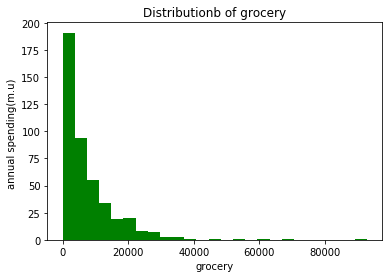

In [25]:
plt.hist(data_of_Grocery,bins=25, facecolor='green')
plt.xlabel('grocery')
plt.ylabel('annual spending(m.u) ')
plt.title('Distributionb of grocery')

### Question 3: Correlation
* Calculate the correlation of 'Grocery' and 'Milk'.
* Make a scatter plot of 'Grocery' and 'Milk'. (*Hint:* Using Matplotlib `.scatter`)
* Make a scatter plot of features together. (*Hint:*  Using Panda `.scatter_matrix`)
* Make a heatmap of features together. (*Hint:* Using Seaborn `.heatmap` )

In [26]:
# Write your answer from here, add more cells if needed

In [27]:
data_o_Milk = data.Milk

In [28]:
corr = np.corrcoef(data_of_Grocery, data_o_Milk)[0][1]
corr

0.7283351181536445

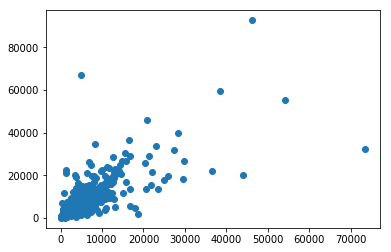

In [29]:
plt.scatter(data_o_Milk,data_of_Grocery)
plt.show()


/home/van-xa/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f868f345d30>,
      dtype=object)

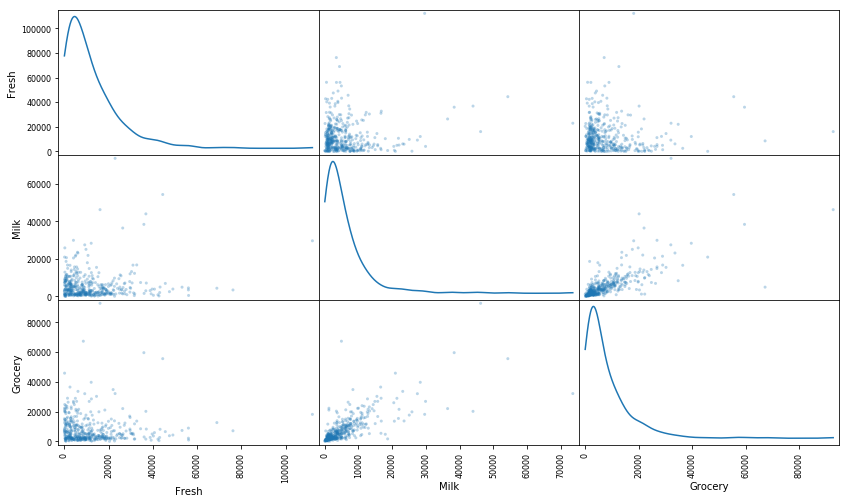

In [30]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

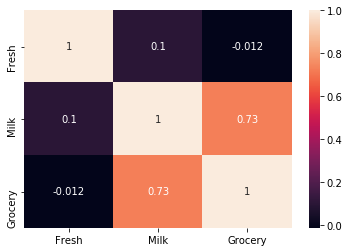

In [31]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

### Question 4: Hypothesis testing (part 1)
* Find the p-values of the non-correlation of pairs: ('Grocery', 'Milk'), ('Grocery', 'Fresh'), ('Fresh','Milk').
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the NULL hypothesis:"'Grocery' and 'Milk' are non-corellated."

In [32]:
# Write your answer from here, add more cells if needed

In [33]:
print("-values of the non-correlation of pairs grocery vs milk :",ss.pearsonr(data.Grocery, data.Milk)[1])
print("-values of the non-correlation of pairs grocery vs fresh :" ,ss.pearsonr(data.Grocery, data.Fresh)[1])
print("-values of the non-correlation of pairs fresh vs milk :",ss.pearsonr(data.Fresh, data.Milk)[1])


-values of the non-correlation of pairs grocery vs milk : 6.480570788053402e-74
-values of the non-correlation of pairs grocery vs fresh : 0.8041728013490431
-values of the non-correlation of pairs fresh vs milk : 0.03506100703784227


In [34]:
"With the significance level 0.1 (p-given or  αα =0.1),  we reject   the hypothesis:Grocery and Milk are corellated."


'With the significance level 0.1 (p-given or  αα =0.1),  we reject   the hypothesis:Grocery and Milk are corellated.'

In [35]:
"With the significance level 0.1 (p-given or  αα =0.1),  we accept the hypothesis: Grocery' and Milk are corellated."


"With the significance level 0.1 (p-given or  αα =0.1),  we accept the hypothesis: Grocery' and Milk are corellated."

In [36]:
"With the significance level 0.1 (p-given or  αα =0.1),  we reject the NULL hypothesis: Grocery' and Milk are non-corellated."


"With the significance level 0.1 (p-given or  αα =0.1),  we reject the NULL hypothesis: Grocery' and Milk are non-corellated."

### Question 5: Data Preprocessing
* Transform the data by using `np.log` and set the new data as the name 'log_data', then visualize this data by using `pd.scatter_matrix`.
* Remove outliers of each features of 'log_data' whose are out of the fencies "$Q1-IQR*1.5$" and "$Q3+IQR*1.5$", set the new data by the name 'good_log_data' then visualize this data.  

In [37]:
# Write your answer from here, add more cells if needed

In [38]:
log_data = np.log(data)
log_data.head()

Fresh      Milk   Grocery
0   9.446913  9.175335  8.930759
1   8.861775  9.191158  9.166179
2   8.756682  9.083416  8.946896
3   9.492884  7.086738  8.347827
4  10.026369  8.596004  8.881558

/home/van-xa/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f868f038eb8>,
      dtype=object)

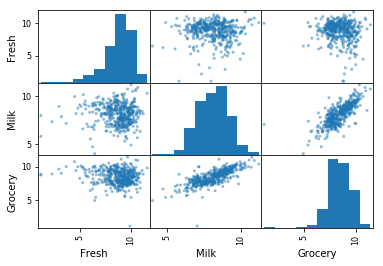

In [39]:
pd.scatter_matrix(log_data)

In [40]:
outliers = []
for feature in ["Milk", "Grocery", "Fresh"]:
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    step = (Q3 - Q1) * 1.5
    print("outlier step", step)
    print("Data points considered outliers for the feature '{}':".format(feature))
    feature_outliers= data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))]
    display(feature_outliers)
    outliers += feature_outliers.index.tolist()


    


outlier step 8485.875
Data points considered outliers for the feature 'Milk':


Fresh   Milk  Grocery
23    26373  36423    22019
28     4113  20484    25957
38     4591  15729    16709
45     5181  22044    21531
47    44466  54259    55571
49     4967  21412    28921
56     4098  29892    26866
61    35942  38369    59598
65       85  20959    45828
85    16117  46197    92780
86    22925  73498    32114
92     9198  27472    32034
109    1406  16729    28986
163    5531  15726    26870
171     200  25862    19816
181  112151  29627    18148
183   36847  43950    20170
211   12119  28326    39694
216    2532  16599    36486
251    6134  23133    33586
254   10379  17972     4748
265    5909  23527    13699
309     918  20655    13567
319    9759  25071    17645
325   32717  16784    13626
358     759  18664     1660
384   10683  21858    15400
427   31012  16687     5429

outlier step 12754.125
Data points considered outliers for the feature 'Grocery':


Fresh   Milk  Grocery
28    4113  20484    25957
43     630  11095    23998
47   44466  54259    55571
49    4967  21412    28921
56    4098  29892    26866
61   35942  38369    59598
65      85  20959    45828
77   12205  12697    28540
85   16117  46197    92780
86   22925  73498    32114
92    9198  27472    32034
109   1406  16729    28986
145  22039   8384    34792
163   5531  15726    26870
201   4484  14399    24708
205   1107  11711    23596
211  12119  28326    39694
216   2532  16599    36486
251   6134  23133    33586
304    161   7460    24773
331  11223  14881    26839
333   8565   4980    67298
343   1689   6964    26316
437  14531  15488    30243

outlier step 20709.0
Data points considered outliers for the feature 'Fresh':


Fresh   Milk  Grocery
29    43088   2100     2609
39    56159    555      902
47    44466  54259    55571
52    40721   3916     5876
87    43265   5025     8117
103   56082   3504     8906
125   76237   3473     7102
129   42312    926     1510
176   45640   6958     6536
181  112151  29627    18148
239   47493   2567     3779
258   56083   4563     2124
259   53205   4959     7336
282   49063   3965     4252
284   68951   4411    12609
285   40254    640     3600
289   42786    286      471
370   39679   3944     4955
377   38793   3154     2648
436   39228   1431      764

In [47]:
log_good_data = log_data.drop(data.index[outliers]).reset_index(drop = True) 
print("Number of outliers (inc duplicates): ", len(outliers))
print("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))

Number of outliers (inc duplicates):  72
New dataset with removed outliers has 384 samples with 3 features each.


### Question 6: Hypothesis testing (part 2) 

 By the method one-sample-t-test, do we accept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The mean of 'Fresh' population (after log-transform) by using the log_data set is different 8.8
* The mean of 'Fresh' population (after log-transform) by using the good_log_data set is differenct 8.8

By the method of two-sample-t-test, do we acept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The means of 'Fresh' in the log_data and good_log_data are different
* The means of 'Milk' in the log_data and good_log_data are different


In [42]:
# Write your answer from here, add more cells if needed

In [43]:
mean_of_fresh = np.mean(log_data.Fresh)
mean_of_fresh

8.730544041198167

In [44]:
ss.ttest_1samp(log_data.Fresh,8.8) #acept

Ttest_1sampResult(statistic=-0.9843582884850726, pvalue=0.3254815721715403)

In [49]:
ss.ttest_1samp(log_good_data.Fresh, 8.8) 

Ttest_1sampResult(statistic=-2.1448780813453823, pvalue=0.03259110408913673)

In [50]:
ss.ttest_ind(np.mean(log_data), np.mean(log_good_data))

Ttest_indResult(statistic=0.4947068785751509, pvalue=0.6467468055994198)